# Churn analysis of Reliance Jio(2023)

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [4]:
data = pd.read_csv("telecom_churn.csv")

In [5]:
data.head(5)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


## Exploring Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


## Data Cleaning

In [7]:
data = data.drop("city", axis = 1)
data = data.drop("pincode", axis = 1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   date_of_registration  243553 non-null  object
 6   num_dependents        243553 non-null  int64 
 7   estimated_salary      243553 non-null  int64 
 8   calls_made            243553 non-null  int64 
 9   sms_sent              243553 non-null  int64 
 10  data_used             243553 non-null  int64 
 11  churn                 243553 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 22.3+ MB


In [12]:
data["date_of_registration"].dtype

dtype('O')

In [13]:
data["date_of_registration"] = pd.to_datetime(data["date_of_registration"]).dt.year

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   date_of_registration  243553 non-null  int32 
 6   num_dependents        243553 non-null  int64 
 7   estimated_salary      243553 non-null  int64 
 8   calls_made            243553 non-null  int64 
 9   sms_sent              243553 non-null  int64 
 10  data_used             243553 non-null  int64 
 11  churn                 243553 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 21.4+ MB


In [15]:
data.head(5)

,customer_id,telecom_partner,gender,age,state,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,2020,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,2020,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,2020,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,2020,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,2020,2,55098,78,15,1393,0


## EDA

## Selecting data of year 2023

In [17]:
data_2023 = data[data["date_of_registration"] == 2023]

In [20]:
data_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24575 entries, 218978 to 243552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           24575 non-null  int64 
 1   telecom_partner       24575 non-null  object
 2   gender                24575 non-null  object
 3   age                   24575 non-null  int64 
 4   state                 24575 non-null  object
 5   date_of_registration  24575 non-null  int32 
 6   num_dependents        24575 non-null  int64 
 7   estimated_salary      24575 non-null  int64 
 8   calls_made            24575 non-null  int64 
 9   sms_sent              24575 non-null  int64 
 10  data_used             24575 non-null  int64 
 11  churn                 24575 non-null  int64 
dtypes: int32(1), int64(8), object(3)
memory usage: 2.3+ MB


### Total number of churn in year 2023

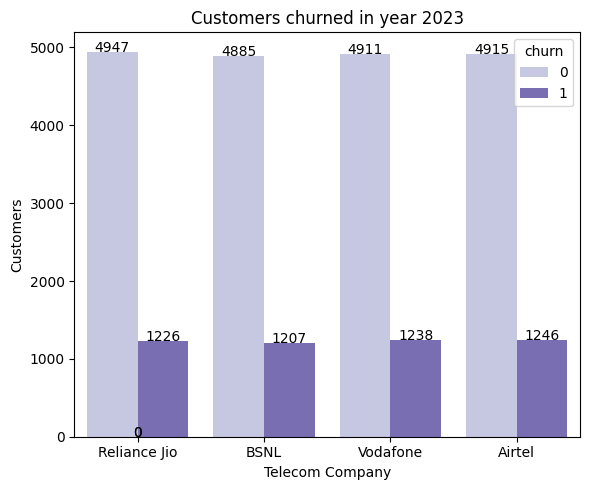

In [153]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x="telecom_partner", data = data_2023, hue = "churn", palette = "Purples", saturation = 1)
plt.xlabel("Telecom Company")
plt.ylabel("Customers")
plt.title("Customers churned in year 2023")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha="center", fontsize=10, color="black")
plt.tight_layout()
plt.show()

##### All telecom companies (Reliance Jio, BSNL, Vodafone, Airtel) have almost equal customer bases (~4900 customers each).
##### Airtel has the highest churn count (1,246), while BSNL has the lowest (1,207).
##### Churn rate is roughly 24–25% for all companies, meaning most customers are retained, but there is still scope to improve retention strategies.
##### Airtel and Vodafone need stronger customer retention strategies, as they show slightly higher churn.
##### BSNL is performing better in retaining customers compared to others.

### Churn Analysis of Reliance Jio

In [39]:
data_2023_reliance = data[(data["date_of_registration"] == 2023) & (data["telecom_partner"] == "Reliance Jio")]

### Customers churned in year 2023

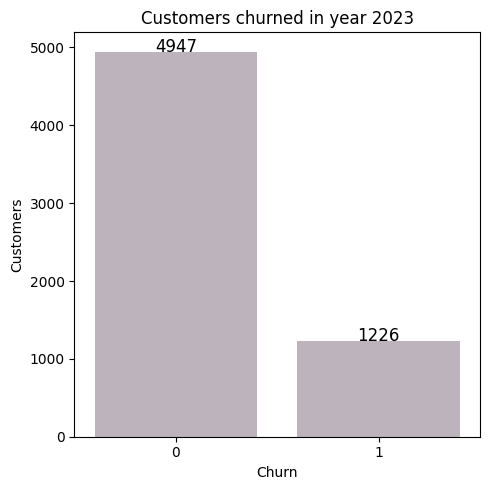

In [152]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="churn", data = data_2023_reliance, color = "violet", saturation = 0.1)
plt.xlabel("Churn")
plt.ylabel("Customers")
plt.title("Customers churned in year 2023")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1,
        int(height),
        ha="center", fontsize=12, color="black")
plt.tight_layout()
plt.show()

##### Most customers (around 80%) stayed with the company.
##### Churn rate is ~20%, which is moderate.
##### This indicates that retention is good overall, but 1 out of every 5 customers still left.

### Churned on the basis of gender

In [58]:
data_2023_reliance.groupby(["gender","churn"])["customer_id"].count()

gender  churn
F       0        1961
        1         521
M       0        2986
        1         705
Name: customer_id, dtype: int64

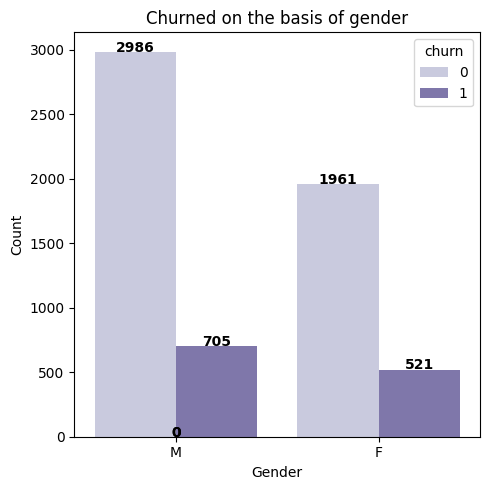

In [151]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="gender", data = data_2023_reliance, hue = "churn", palette = "Purples")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churned on the basis of gender")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.5,
        int(height),
        ha="center", fontsize=10, fontweight="bold", color="black")
plt.tight_layout()
plt.show()

##### More male customers overall (3691) compared to females (2482).
##### Male churn count = 705, Female churn count = 521.
##### Churn rate is slightly higher for females (~20%) compared to males (~19%).

### Churned on the basis of state

In [98]:
data_2023_reliance.groupby(["state","churn"])["customer_id"].count()

state              churn
Andhra Pradesh     0        167
                   1         43
Arunachal Pradesh  0        167
                   1         46
Assam              0        181
                   1         47
Bihar              0        162
                   1         46
Chhattisgarh       0        177
                   1         38
Goa                0        180
                   1         45
Gujarat            0        174
                   1         46
Haryana            0        172
                   1         46
Himachal Pradesh   0        174
                   1         36
Jharkhand          0        178
                   1         52
Karnataka          0        197
                   1         36
Kerala             0        154
                   1         28
Madhya Pradesh     0        203
                   1         42
Maharashtra        0        174
                   1         50
Manipur            0        156
                   1         44
Meghalaya      

In [94]:
state_order = data_2023_reliance['state'].value_counts().index
print(state_order)

Index(['Uttarakhand', 'Madhya Pradesh', 'Mizoram', 'Tamil Nadu', 'Karnataka',
       'Jharkhand', 'West Bengal', 'Assam', 'Telangana', 'Goa', 'Maharashtra',
       'Nagaland', 'Odisha', 'Gujarat', 'Haryana', 'Punjab', 'Chhattisgarh',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya', 'Andhra Pradesh',
       'Himachal Pradesh', 'Uttar Pradesh', 'Bihar', 'Sikkim', 'Rajasthan',
       'Manipur', 'Kerala'],
      dtype='object', name='state')


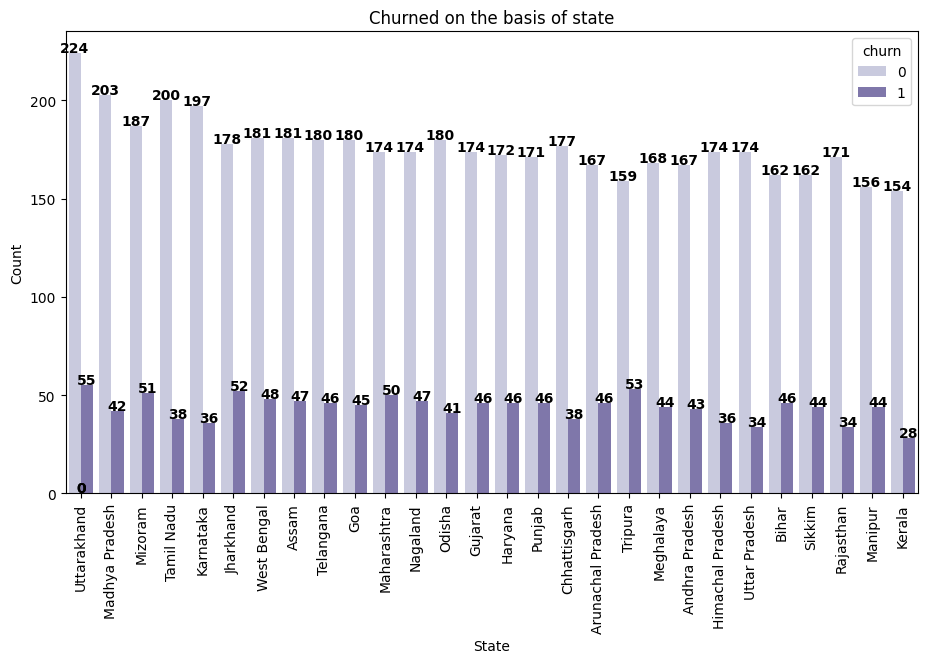

In [150]:
plt.figure(figsize=(11,6))
ax = sns.countplot(x="state", data = data_2023_reliance, hue = "churn", palette = "Purples", order = state_order)
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.title("Churned on the basis of state")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.5,
        int(height),
        ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()

##### Uttarakhand has both the highest customers(224) and the highest churn count(55).
##### Kerala has the lowest churn count(28), indicating better retention.
##### States like Karnataka, Jharkhand, and West Bengal have moderate customer bases but high churn numbers, meaning retention can be improved there.

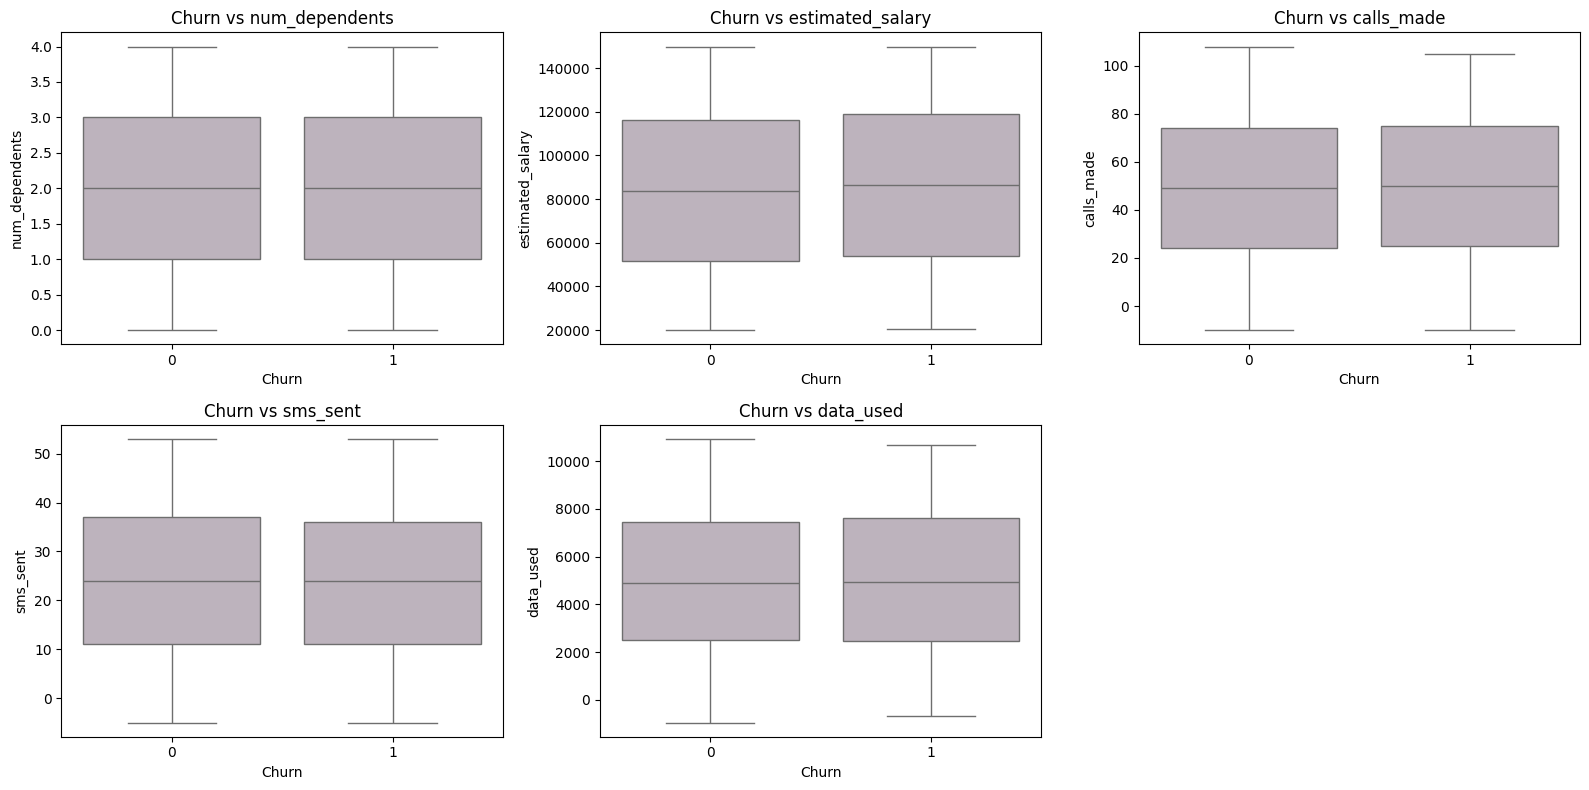

In [149]:
cols = ["num_dependents", "estimated_salary", "calls_made", "sms_sent", "data_used"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x="churn", y=col, data=data_2023_reliance, ax=axes[i], color = "violet", saturation = 0.1)
    axes[i].set_title(f"Churn vs {col}")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(col)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

##### Demographics (dependents, salary) do not significantly affect churn.
##### Engagement (calls, SMS) shows a slight pattern – low activity may lead to churn.
##### Data usage does not seem to be a churn driver.